In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # for standarization
from sklearn.preprocessing import MinMaxScaler      # for normalization
import matplotlib.pyplot as plt                     # for visualization
import seaborn as sns

training set dan testing set

In [3]:
dataset_melb = pd.read_csv('wine.csv')
dataset_melb.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,MEDIUM
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM


In [4]:
print(f'The length of melb dataset is {len(dataset_melb)} row')

The length of melb dataset is 500 row


Bagi dataset menjadi training set dan testing set dengan proporsi 70:30

In [5]:
data_train = dataset_melb[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']][:350]
label_train = dataset_melb['quality'][:350]
data_test = dataset_melb[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']][-151:]
label_test = dataset_melb['quality'][-151:]

In [6]:
print(f'the length of data train is {len(data_train)} row',
      f'the length of label train is {len(label_train)} row',
      f'the length of data test is {len(data_test)} row',
      f'the length of label test is {len(label_test)} row',
      f'the length of total dataset is {len(dataset_melb)} row',
      sep='\n')

the length of data train is 350 row
the length of label train is 350 row
the length of data test is 151 row
the length of label test is 151 row
the length of total dataset is 500 row


In [7]:
data_X = dataset_melb[['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide']]
label_Y = dataset_melb['quality']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_X, label_Y, test_size=.2)

In [9]:
print(f'the length of data train is {len(x_train)} row',
      f'the length of label train is {len(y_train)} row',
      f'the length of data test is {len(x_test)} row',
      f'the length of label test is {len(y_test)} row',
      f'the length of total dataset is {len(dataset_melb)} row',
      sep='\n')

the length of data train is 400 row
the length of label train is 400 row
the length of data test is 100 row
the length of label test is 100 row
the length of total dataset is 500 row


Standarization

In [13]:
dataset_used_standarization = dataset_melb.copy()
dataset_used_standarization.drop('grade', axis=1, inplace=True)
standart_std = StandardScaler()
scaled_data = standart_std.fit_transform(dataset_used_standarization)

In [14]:
print('Dataset sebelum scalling:',  # before
      dataset_melb.head(6),
      f'Nilai standar deviasi:\n{np.std(dataset_melb)}',
      sep='\n', end='\n\n')

print('Dataset setelah scalling:',  # after
      scaled_data[:6],
      f'Nilai standar deviasi: {np.std(scaled_data)}',
      sep='\n')

Dataset sebelum scalling:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                    34   0.9978  3.51       0.56   
1                 25.0                    67   0.9968  3.20       0.68   
2                 15.0                    54   0.9970  3.26       0.65   
3                 17.0                    60   0.9980  3.16       0.58   
4                 11.0                    34   0.9978  3.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


normalization

In [15]:
dataset_normalization = dataset_melb.copy()
scaler = MinMaxScaler()
normalize_dataset = scaler.fit_transform(dataset_normalization[['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide']])
normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.rename(columns={0:'fixed acidity',1:'volatile acidity',2:'free sulfur dioxide',3:'total sulfur dioxide',})

,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide
0,0.254545,0.452174,0.123077,0.165605
1,0.290909,0.608696,0.338462,0.375796
2,0.290909,0.504348,0.184615,0.292994
3,0.600000,0.086957,0.215385,0.331210
4,0.254545,0.452174,0.123077,0.165605
...,...,...,...,...
495,0.554545,0.147826,0.030769,0.050955
496,0.290909,0.295652,0.169231,0.191083
497,0.236364,0.139130,0.615385,0.668790
498,0.554545,0.147826,0.030769,0.050955


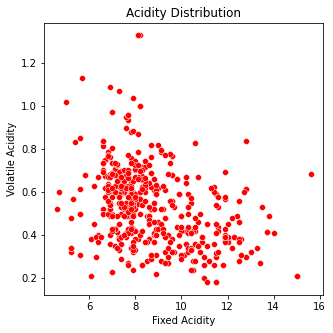

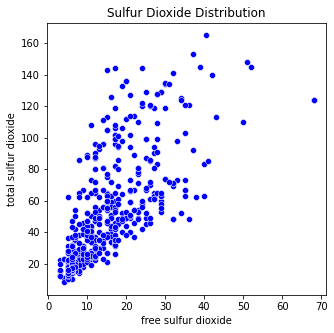

In [21]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(data = dataset_normalization, x='fixed acidity', y='volatile acidity', color='red')
plt.title('Acidity Distribution')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')

plt.figure(2, figsize=(5,5))
sns.scatterplot(data = dataset_normalization, x='free sulfur dioxide', y='total sulfur dioxide', color='blue')
plt.title('Sulfur Dioxide Distribution')
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')

plt.show()

In [26]:
from sklearn.impute import SimpleImputer

data cleaning

In [49]:
dataset_nashville = pd.read_csv("winee.csv",
                             sep=',')
dataset_nashville.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,MEDIUM
4,NaN,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,NaN


terdapat data yang kosong(tidak ternilai)

In [50]:
# check the dataset have null value or not
print(dataset_nashville.isna().sum())

# conclusion => there are several column with null value. That is
# OwnerName, Acreage, LandValue, BuildingValue, TotalValue, YearBuilt, 
# Bedrooms, FullBath, HalfBath, OwnerSplitAddress, OwnerSplitCity, OwnerSplitState

# copy the dataset into new dataframe
dataset_nashville_used = dataset_nashville.copy()

fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
grade                   2
dtype: int64


In [51]:
dataset_nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         518 non-null    float64
 1   volatile acidity      519 non-null    float64
 2   citric acid           518 non-null    float64
 3   residual sugar        519 non-null    float64
 4   chlorides             518 non-null    float64
 5   free sulfur dioxide   519 non-null    float64
 6   total sulfur dioxide  519 non-null    int64  
 7   density               519 non-null    float64
 8   pH                    519 non-null    float64
 9   sulphates             519 non-null    float64
 10  alcohol               519 non-null    float64
 11  quality               519 non-null    int64  
 12  grade                 517 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 52.8+ KB


bilangan bulat : median/modus, bilangan desimal : mean, tulisan : modus

In [53]:
imputer_mean = SimpleImputer(strategy='mean')           
imputer_median = SimpleImputer(strategy='median')       
imputer_modus = SimpleImputer(strategy='most_frequent') 

In [57]:
# replacing the null value with mean value => only for numeric dataset (the value that could be decimal)
dataset_nashville_used['fixed acidity'] = imputer_mean.fit_transform(dataset_nashville_used[['fixed acidity']])
dataset_nashville_used['volatile acidity'] = imputer_mean.fit_transform(dataset_nashville_used[['volatile acidity']])
dataset_nashville_used['citric acid'] = imputer_mean.fit_transform(dataset_nashville_used[['citric acid']])
dataset_nashville_used['residual sugar'] = imputer_mean.fit_transform(dataset_nashville_used[['residual sugar']])

# replacing the null value with median value => only for numeric dataset (the value that only be ronded value)
dataset_nashville_used['chlorides'] = imputer_median.fit_transform(dataset_nashville_used[['chlorides']])
dataset_nashville_used['free sulfur dioxide'] = imputer_median.fit_transform(dataset_nashville_used[['free sulfur dioxide']])
dataset_nashville_used['density'] = imputer_median.fit_transform(dataset_nashville_used[['density']])
dataset_nashville_used['pH'] = imputer_median.fit_transform(dataset_nashville_used[['pH']])

In [58]:
dataset_nashville_used['grade'] = imputer_modus.fit_transform(dataset_nashville_used[['grade']])

In [59]:
dataset_nashville_used.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
grade                   0
dtype: int64

In [70]:
dataset_melb2 = pd.read_csv('winee.csv')
dataset_melb2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,MEDIUM
4,NaN,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,NaN


menghapus data duplicate

In [71]:
dataset_melb2.duplicated().sum()

80

In [79]:
dataset_melb2.drop_duplicates(inplace=True)
dataset_melb2.duplicated().sum()

0

one hot encoding

In [80]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [81]:
dataset_ordinal_encoding = dataset_melb2.copy()
dataset_oneHot_encoding = dataset_melb2.copy()

In [82]:
dataset_melb2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,MEDIUM
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,MEDIUM
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,MEDIUM
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,MEDIUM
4,NaN,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,NaN


one hot encoding

In [88]:
dataset_oneHot_encoding1 = dataset_oneHot_encoding.copy()
# make the used tools
encoder_oneHot = OneHotEncoder(sparse=False)

# encode the label attribute from categorical into binary
temp_dataset = encoder_oneHot.fit_transform(dataset_oneHot_encoding1[['grade']]).astype('int32')

# reformat the dataset into dataframe
temp_dataset = pd.DataFrame(temp_dataset)

dataset_oneHot_encoding1.drop('grade', axis=1, inplace=True)
dataset_oneHot_encoding1 = dataset_oneHot_encoding1.join(temp_dataset)
dataset_oneHot_encoding1.rename(columns={0:'LOW', 1:'MEDIUM', 2:'HIGH'}, inplace=True)
dataset_oneHot_encoding1[85:100]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,LOW,MEDIUM,HIGH,3
89,7.0,0.620,0.08,1.8,0.076,8.0,24,0.9978,3.48,0.53,9.0,5,0.0,0.0,1.0,0.0
90,7.9,0.520,0.26,1.9,0.079,42.0,140,0.9964,3.23,0.54,9.5,5,0.0,0.0,1.0,0.0
92,8.6,0.490,0.29,2.0,0.110,19.0,133,0.9972,2.93,1.98,9.8,5,0.0,0.0,1.0,0.0
94,5.0,1.020,0.04,1.4,0.045,41.0,85,0.9938,3.75,0.48,10.5,4,0.0,0.0,1.0,0.0
95,4.7,0.600,0.17,2.3,0.058,17.0,106,0.9932,3.85,0.60,12.9,6,0.0,0.0,1.0,0.0
96,6.8,0.775,0.00,3.0,0.102,8.0,23,0.9965,3.45,0.56,10.7,5,0.0,0.0,1.0,0.0
97,7.0,0.500,0.25,2.0,0.070,3.0,22,0.9963,3.25,0.63,9.2,5,0.0,0.0,1.0,0.0
98,7.6,0.900,0.06,2.5,0.079,5.0,10,0.9967,3.39,0.56,9.8,5,0.0,0.0,1.0,0.0
99,8.1,0.545,0.18,1.9,0.080,13.0,35,0.9972,3.30,0.59,9.0,6,0.0,0.0,1.0,0.0
100,8.3,0.610,0.30,2.1,0.084,11.0,50,0.9972,3.40,0.61,10.2,6,0.0,0.0,1.0,0.0


In [89]:
dataset_oneHot_encoding2 = dataset_oneHot_encoding.copy()
temp_dataset = pd.get_dummies(dataset_oneHot_encoding2[['grade']])
temp_dataset = pd.DataFrame(temp_dataset)
dataset_oneHot_encoding2.drop('grade', axis=1, inplace=True)
dataset_oneHot_encoding2 = dataset_oneHot_encoding2.join(temp_dataset)

#show
dataset_oneHot_encoding2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade_HIGH,grade_LOW,grade_MEDIUM
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6,0,0,1
4,NaN,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5,0,0,0
